In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from sklearn.metrics import mean_squared_error
from datetime import datetime
#import arrow
plt.style.use('fivethirtyeight')

In [15]:
path = "./Data/Daily_Summaries/Daily_Summaries_Merged.csv"
d = ","
wx = pd.read_csv(path,delimiter=d)
wx.DATE = pd.to_datetime(wx.DATE)
wx.rename(columns={'DATE':'Date_Join'},inplace = True)
#wx.drop(['LATITUDE','LONGITUDE'],axis = 1,inplace=True);
#wx.head()

In [18]:
wx.loc[wx['STATION'] == 'USW00024233', 'NAME'] = 'SeaTac'
wx.loc[wx['STATION'] == 'USW00024234', 'NAME'] = 'Boeing_Field'
wx.loc[wx['STATION'] == 'US1WAKG0079', 'NAME'] = 'Magnolia'
wx.loc[wx['STATION'] == 'US1WAKG0145', 'NAME'] = 'Phinney'
wx.loc[wx['STATION'] == 'US1WAKG0200', 'NAME'] = 'Georgetown'
wx.loc[wx['STATION'] == 'US1WAKG0199', 'NAME'] = 'GreenWood'
wx.loc[wx['STATION'] == 'US1WAKG0225', 'NAME'] = 'Cap_Hill'
wx.loc[wx['STATION'] == 'US1WAKG0239', 'NAME'] = 'Woodland_Park'


In [20]:
wx.NAME.value_counts()

SeaTac           3422
Boeing_Field     3413
Magnolia         2745
Phinney          1844
Georgetown       1581
GreenWood        1008
Cap_Hill          506
Woodland_Park     404
Name: NAME, dtype: int64

In [21]:
def Date_Table(start='2000-01-01', end='2019-12-31'):
    df = pd.DataFrame({"Date_Join": pd.date_range(start, end)})
    df["Day_Name"] = df.Date_Join.dt.weekday_name
    df["Week"] = df.Date_Join.dt.weekofyear
    df["Month"] = df.Date_Join.dt.month
    df["Year_Month"]= df.Date_Join.dt.strftime('%Y-%m')
    df["Quarter"] = df.Date_Join.dt.quarter
    df["Year"] = df.Date_Join.dt.year
    df["Year_half"] = (df.Quarter + 1) // 2
    return df

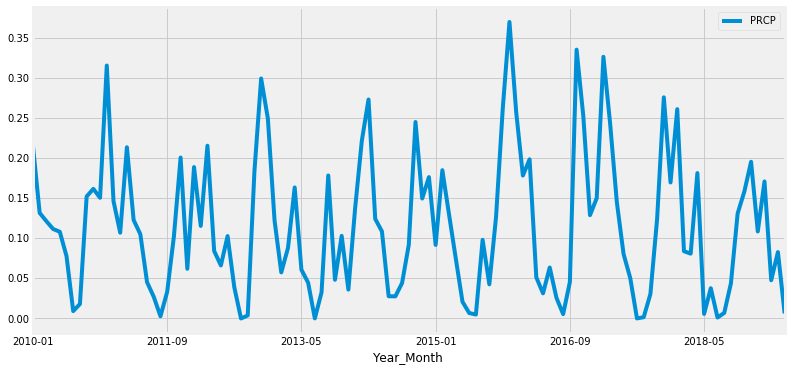

In [23]:
DD= Date_Table()
data = wx.merge(DD, how='inner',on='Date_Join')
daily_mean = data.groupby(['Year_Month']).mean()
daily_mean[['PRCP']].plot.line(figsize = (12,6))

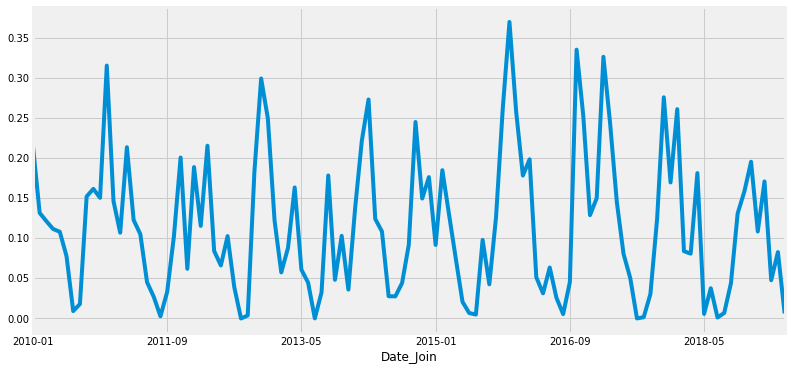

In [24]:
#getting closer this would have summed all 3 of the stations. able to get my Year-month right her instead of date table
wx.groupby(wx.Date_Join.dt.strftime('%Y-%m')).PRCP.mean().plot.line(figsize = (12,6))

In [42]:
#https://w2.weather.gov/climate/xmacis.php?wfo=sew
#wx[wx['Date_Join'] == '2016-10-13']

#totals from October of 16
wx.loc[(wx['Date_Join'].dt.month==10) & (wx['Date_Join'].dt.year==2016)].groupby(['NAME']).sum()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,TAVG,TMAX,TMIN
NAME,,,,,,,
Boeing_Field,1473.43868,-3791.32573,189.1,10.48,0.0,1909.0,1473.0
Georgetown,1473.86400,-3791.41780,1860.0,11.55,0.0,0.0,0.0
GreenWood,1239.84640,-3181.41720,2155.4,8.11,0.0,0.0,0.0
Magnolia,1429.22400,-3672.24600,2799.0,9.49,0.0,0.0,0.0
Phinney,1096.68370,-2814.40650,1704.3,7.69,0.0,0.0,0.0
SeaTac,1470.77640,-3791.72780,3496.8,10.05,1679.0,1877.0,1522.0


In [33]:
spu = pd.read_csv("https://data.seattle.gov/resource/rdtp-hzy3.csv")
#convert values to dates
spu.date = pd.to_datetime(spu.date)
#Convert to start of month
spu.date = spu.date.values.astype('datetime64[M]')
spu[spu['date'] == '2016-10-01']

,date,rg01,rg02,rg03,rg04,rg05,rg07,rg08,rg09,rg10_30,rg11,rg12,rg14,rg15,rg16,rg17,rg18,rg20_25
167,2016-10-01,10.53,10.4,9.86,9.92,9.74,10.45,9.19,9.14,10.37,9.76,10.32,11.03,10.34,10.36,8.1,10.51,11.13
